<a href="https://colab.research.google.com/github/Riyaz364/Sales_Analysis/blob/main/Health%20Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the latest version of the dataset
path = kagglehub.dataset_download("teertha/ushealthinsurancedataset")

100%|██████████| 16.0k/16.0k [00:00<00:00, 18.0MB/s]

Extracting files...


In [3]:
# Display the path to dataset files
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/teertha/ushealthinsurancedataset/versions/1


In [4]:
# Load the dataset
# Assuming the dataset is in CSV format and located in the downloaded path
file_path = f"{path}/insurance.csv"  # Update the filename if necessary
data = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [8]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


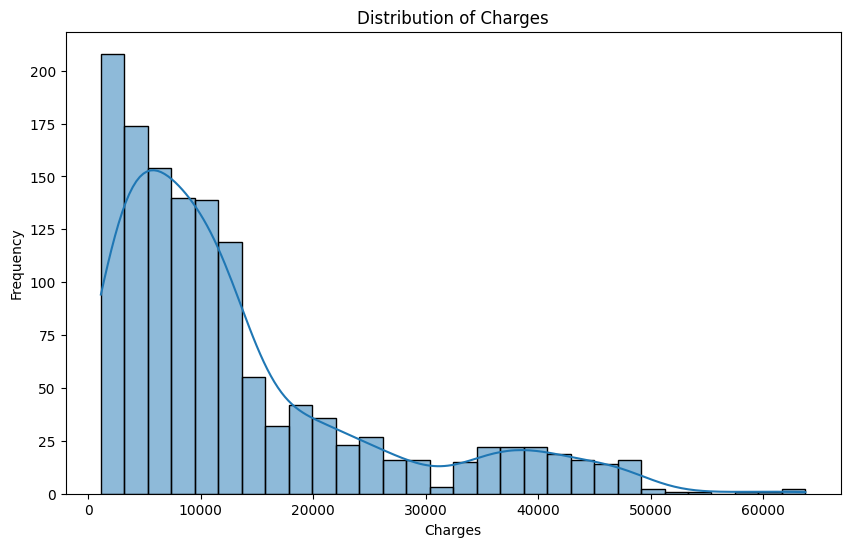

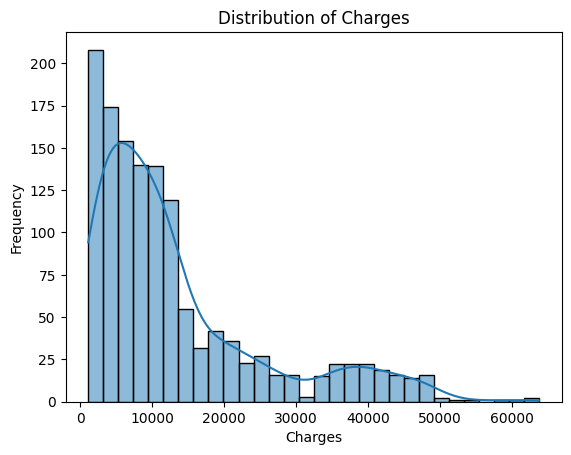

In [10]:
# Data Visualization
# 1. Distribution of Charges
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

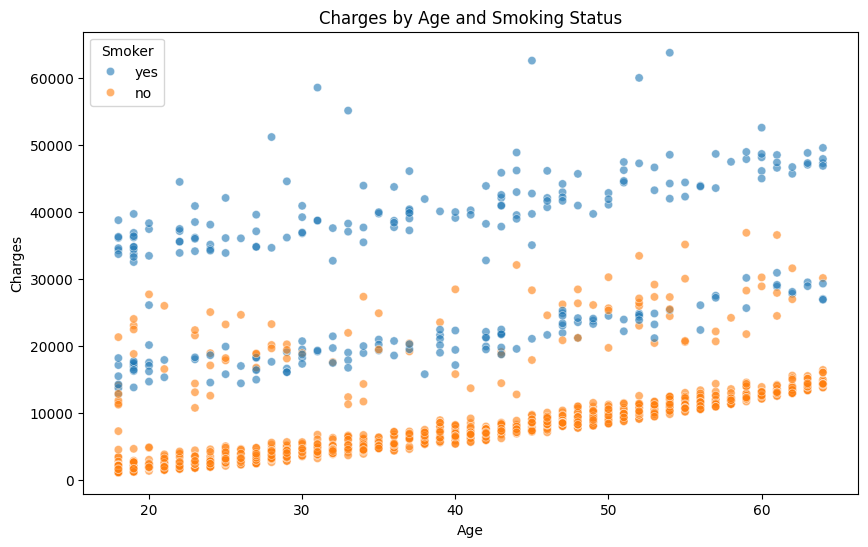

In [11]:
# 2. Charges by Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data, hue='smoker', alpha=0.6)
plt.title('Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker', loc='upper left')
plt.show()

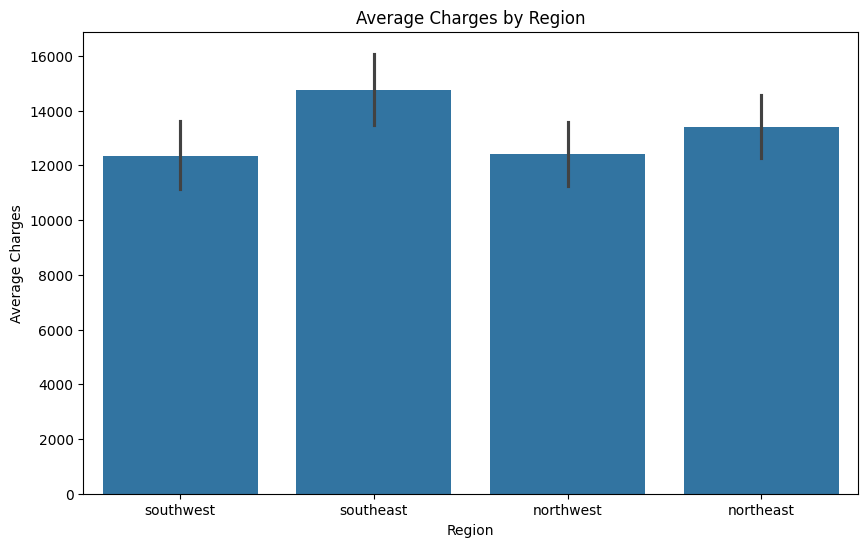

In [12]:
# 3. Average Charges by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=data, estimator=np.mean)
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

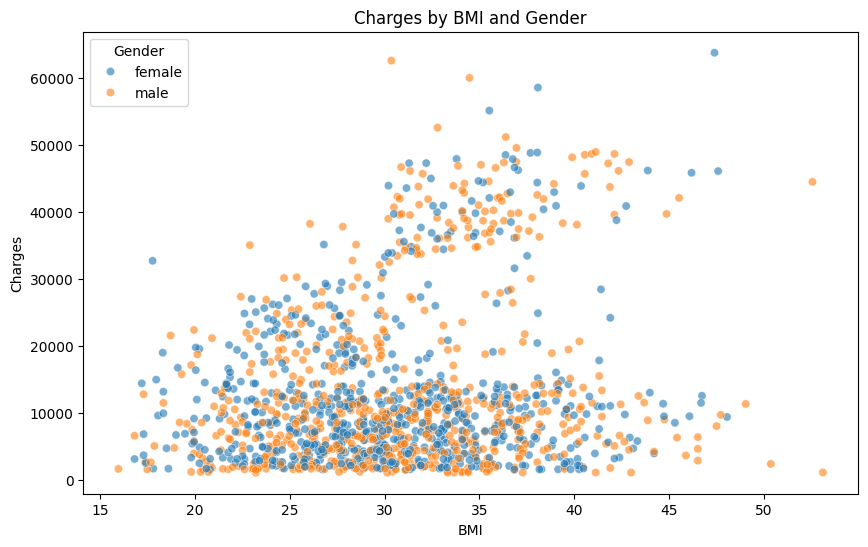

In [13]:
# 4. Charges by BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='sex', alpha=0.6)
plt.title('Charges by BMI and Gender')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Gender', loc='upper left')
plt.show()

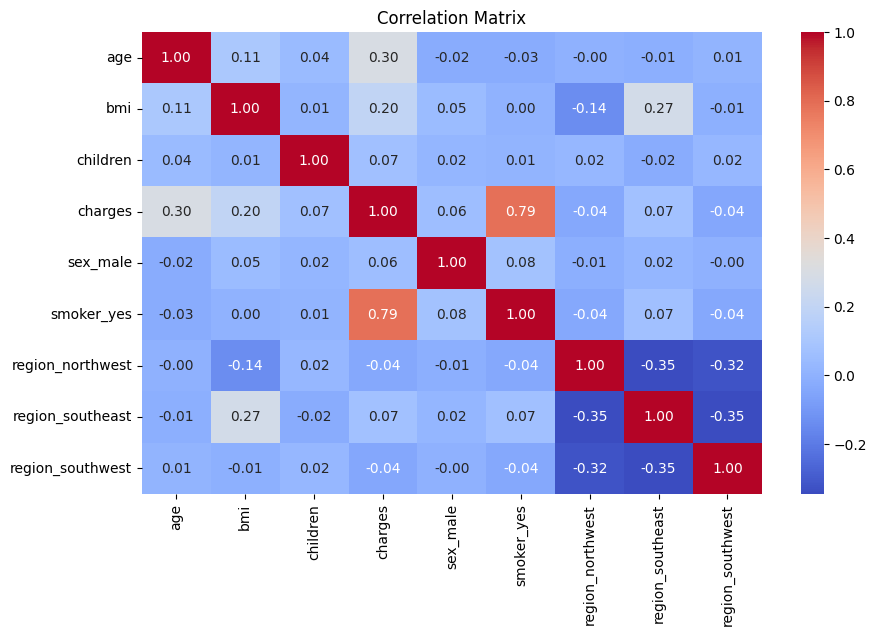

In [15]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
# Convert 'sex' and 'smoker' columns to numerical representation using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
# drop_first=True to avoid multicollinearity

# Calculate the correlation matrix on the encoded data
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:

# Additional Analysis: Grouping by Smoker Status
smoker_analysis = data.groupby('smoker')['charges'].mean().reset_index()
print("\nAverage Charges by Smoker Status:")
print(smoker_analysis)

# Save the cleaned data if needed
# data.to_csv('cleaned_insurance_data.csv',


Average Charges by Smoker Status:
  smoker       charges
0     no   8434.268298
1    yes  32050.231832


In [17]:

print("Cleaned data has been saved to 'cleaned_insurance_data.csv'")

Cleaned data has been saved to 'cleaned_insurance_data.csv'
